<a href="https://www.kaggle.com/code/sanjidh090/details-of-whispers?scriptVersionId=250504514" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kuet-whispers/whispers.csv


Analysis complete. Three plot images have been saved to your directory.
avg_likes_per_hour.png
avg_comments_per_hour.png
avg_likes_and_comments_per_hour.png


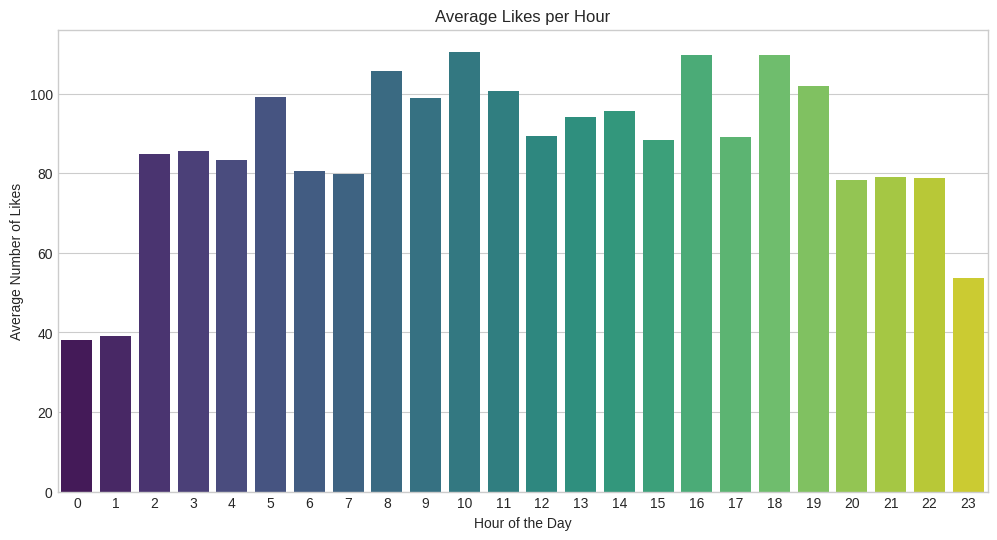

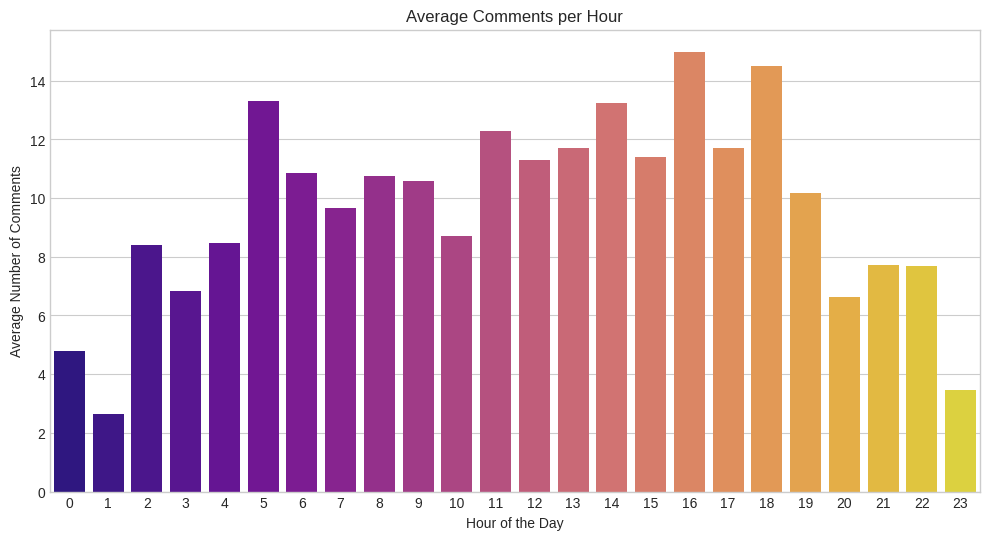

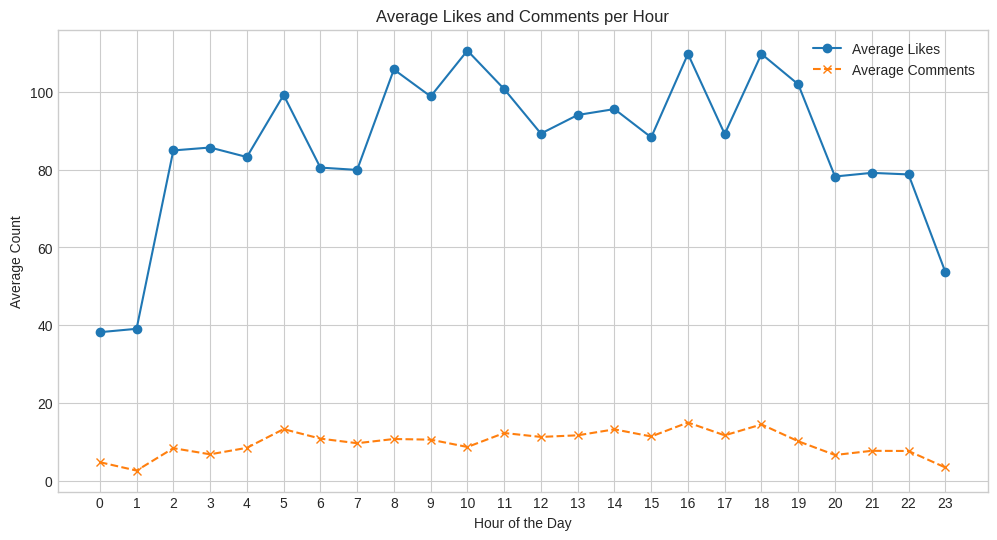

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the CSV file
df = pd.read_csv('/kaggle/input/kuet-whispers/whispers.csv')

# Convert the 'time' column from text to a proper datetime format
# This allows us to work with the date and time components
df['time'] = pd.to_datetime(df['time'])

# Extract the hour from the 'time' column and create a new 'hour' column
df['hour'] = df['time'].dt.hour

# Group the data by the 'hour' and calculate the average (mean) of 'likes' and 'comments' for each hour
engagement_by_hour = df.groupby('hour')[['likes', 'comments']].mean().reset_index()

# Set a visually appealing style for the plots
plt.style.use('seaborn-v0_8-whitegrid')

# --- Plot 1: Bar Plot for Average Likes per Hour ---
# Create a figure with a specific size for better readability
plt.figure(figsize=(12, 6))
# Use seaborn to create the bar plot
sns.barplot(
    x='hour',
    y='likes',
    data=engagement_by_hour.sort_values('likes', ascending=False), # Sort bars for clarity
    palette='viridis' # Use a color scheme
)
# Set the title and labels for the plot
plt.title('Average Likes per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Likes')
# Save the plot as an image file
plt.savefig('avg_likes_per_hour.png')
# plt.show() # Use this line instead of savefig() if running in a local environment like Jupyter

# --- Plot 2: Bar Plot for Average Comments per Hour ---
plt.figure(figsize=(12, 6))
sns.barplot(
    x='hour',
    y='comments',
    data=engagement_by_hour.sort_values('comments', ascending=False), # Sort bars
    palette='plasma' # Use a different color scheme
)
plt.title('Average Comments per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Comments')
plt.savefig('avg_comments_per_hour.png')
# plt.show()

# --- Plot 3: Line Plot for Average Likes and Comments per Hour ---
plt.figure(figsize=(12, 6))
# Plot average likes over time
plt.plot(engagement_by_hour['hour'], engagement_by_hour['likes'], marker='o', linestyle='-', label='Average Likes')
# Plot average comments over time on the same graph
plt.plot(engagement_by_hour['hour'], engagement_by_hour['comments'], marker='x', linestyle='--', label='Average Comments')
# Set the title, labels, and other plot properties
plt.title('Average Likes and Comments per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.xticks(range(24)) # Ensure all 24 hours are shown on the x-axis
plt.legend() # Display the legend to identify the lines
plt.savefig('avg_likes_and_comments_per_hour.png')
# plt.show()

print("Analysis complete. Three plot images have been saved to your directory.")
print("avg_likes_per_hour.png")
print("avg_comments_per_hour.png")
print("avg_likes_and_comments_per_hour.png")

Text content analysis complete. Word cloud image saved: word_cloud.png

Most Common Words:
         word  frequency
0           ন       1274
1          কর       1134
2         আমর        942
3   anonymous        777
4        like        768
5          আর        715
6          আম        693
7        dont        635
8          থক        634
9          এর        589
10         কন        567
11       kuet        561
12          য        551
13          ক        550
14       know        538
15        একট        535
16         পর        530
17       even        508
18         এই        504
19       life        477

Most Common Bigrams:
              bigram  frequency
0       (dont, know)        133
1       (feel, like)         80
2      (feels, like)         62
3       (dont, want)         48
4       (dont, even)         44
5   (kuet, whispers)         44
6         (one, day)         42
7           (মন, হয়)         41
8            (হব, ন)         35
9          (আমর, সথ)         34
10        

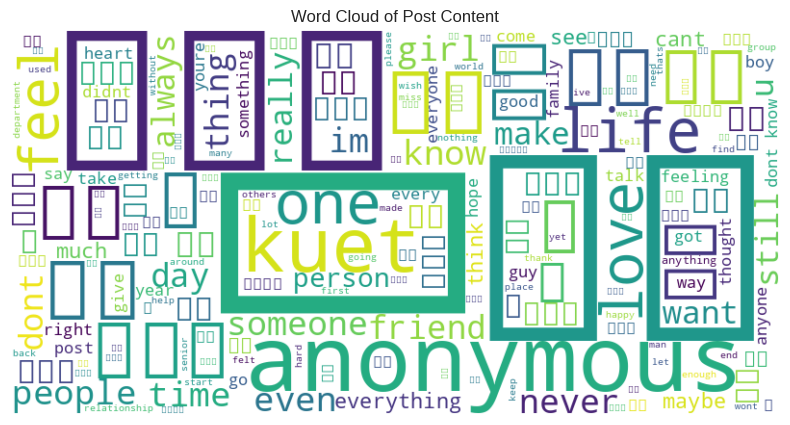

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.util import ngrams

# Manually defined list of English stopwords to avoid NLTK download issues
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but',
    'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
    'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when',
    'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
    'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',
    'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't",
    'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven',
    "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan',
    "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
])

# Load the dataset
df = pd.read_csv('/kaggle/input/kuet-whispers/whispers.csv')

# --- Text Cleaning Function ---
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    # Remove stopwords from the text
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# Apply the cleaning function
df['processed_text'] = df['cleaned_text'].apply(clean_text)

# --- Word Frequency Analysis ---
# Combine all processed text into one string and split into words
all_words = " ".join(df['processed_text']).split()
# Count the frequency of each word (unigrams)
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)

# Count the frequency of each two-word phrase (bigrams)
bigram_counts = Counter(ngrams(all_words, 2))
most_common_bigrams = bigram_counts.most_common(20)

# --- Word Cloud Visualization ---
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Post Content')
plt.savefig('word_cloud.png')
# plt.show()

# --- Engagement Analysis for Top Words ---
word_engagement = []
for word, freq in most_common_words:
    # Find all posts that contain the current word
    word_subset = df[df['processed_text'].str.contains(r'\b' + re.escape(word) + r'\b', na=False)]
    if not word_subset.empty:
        # Calculate the average likes and comments for these posts
        avg_likes = word_subset['likes'].mean()
        avg_comments = word_subset['comments'].mean()
        word_engagement.append((word, freq, avg_likes, avg_comments))

# Create a DataFrame to display the results
word_engagement_df = pd.DataFrame(word_engagement, columns=['word', 'frequency', 'average_likes', 'average_comments'])

# Print all the results
print("Text content analysis complete. Word cloud image saved: word_cloud.png")
print("\nMost Common Words:")
print(pd.DataFrame(most_common_words, columns=['word', 'frequency']))
print("\nMost Common Bigrams:")
print(pd.DataFrame(most_common_bigrams, columns=['bigram', 'frequency']))
print("\nEngagement for Posts Containing Top Words:")
print(word_engagement_df)

Text content analysis (English only) complete.

Most Common English Words:
         word  frequency
0   anonymous        779
1        like        768
2        dont        635
3        kuet        562
4        know        538
5        even        508
6        life        477
7         one        463
8        love        433
9          im        401
10      never        396
11     people        368
12       time        355
13       feel        343
14       want        292
15    someone        291
16        get        289
17      would        270
18       cant        268
19        day        266

Most Common English Bigrams:
                    bigram  frequency
0             (dont, know)        133
1   (anonymous, anonymous)         82
2             (feel, like)         80
3            (feels, like)         62
4             (dont, want)         48
5         (kuet, whispers)         45
6             (dont, even)         44
7               (one, day)         42
8             (felt, like)  

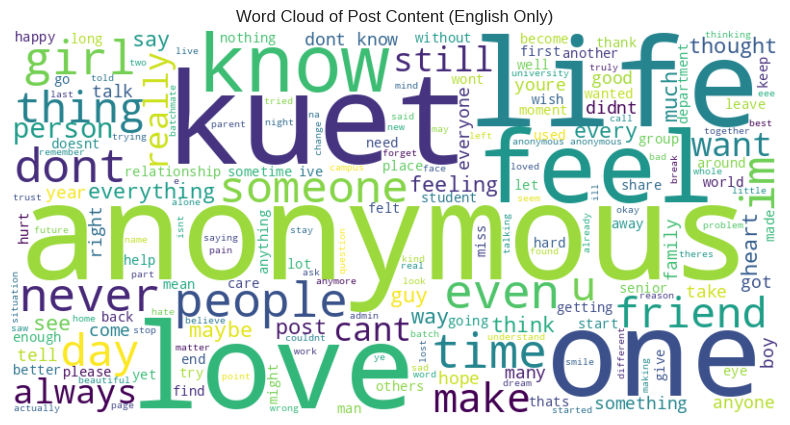

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.util import ngrams

# Manually defined list of English stopwords to avoid NLTK download issues
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but',
    'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
    'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when',
    'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
    'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',
    'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't",
    'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven',
    "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan',
    "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
])

# Load the dataset
df = pd.read_csv('/kaggle/input/kuet-whispers/whispers.csv')

# --- Updated Text Cleaning Function ---
def clean_text_english_only(text):
    # Remove non-ASCII characters (emojis, Bangla script, etc.)
    text = text.encode('ascii', 'ignore').decode('ascii')
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    # Remove stopwords from the text
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# Apply the updated cleaning function to the 'cleaned_text' column
df['processed_text'] = df['cleaned_text'].apply(clean_text_english_only)

# --- Word Frequency Analysis ---
all_words = " ".join(df['processed_text']).split()
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)
bigram_counts = Counter(ngrams(all_words, 2))
most_common_bigrams = bigram_counts.most_common(20)

# --- Word Cloud Visualization ---
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Post Content (English Only)')
plt.savefig('word_cloud_english_only.png')

# --- Engagement Analysis for Top Words ---
word_engagement = []
for word, freq in most_common_words:
    word_subset = df[df['processed_text'].str.contains(r'\b' + re.escape(word) + r'\b', na=False)]
    if not word_subset.empty:
        avg_likes = word_subset['likes'].mean()
        avg_comments = word_subset['comments'].mean()
        word_engagement.append((word, freq, avg_likes, avg_comments))

word_engagement_df = pd.DataFrame(word_engagement, columns=['word', 'frequency', 'average_likes', 'average_comments'])

# --- Print all results ---
print("Text content analysis (English only) complete.")
print("\nMost Common English Words:")
print(pd.DataFrame(most_common_words, columns=['word', 'frequency']))
print("\nMost Common English Bigrams:")
print(pd.DataFrame(most_common_bigrams, columns=['bigram', 'frequency']))
print("\nEngagement for Posts Containing Top English Words:")
print(word_engagement_df)

Keyword-based sentiment analysis complete.


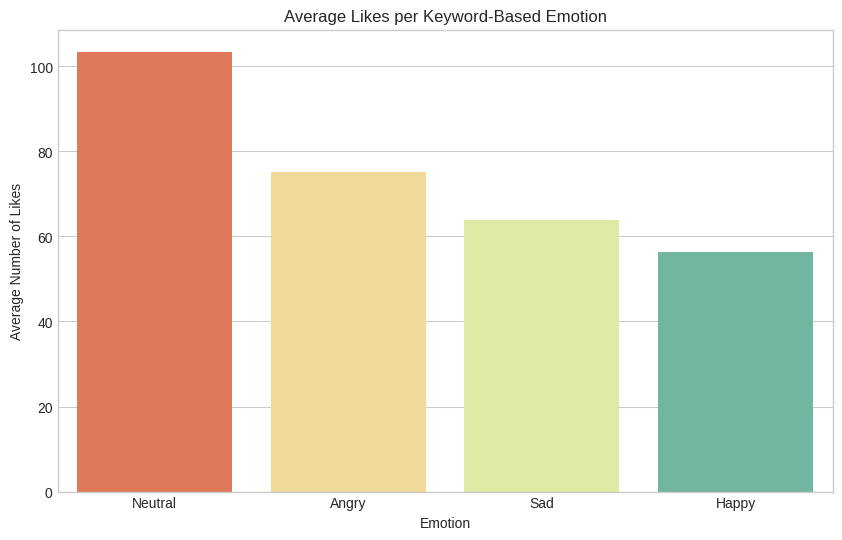

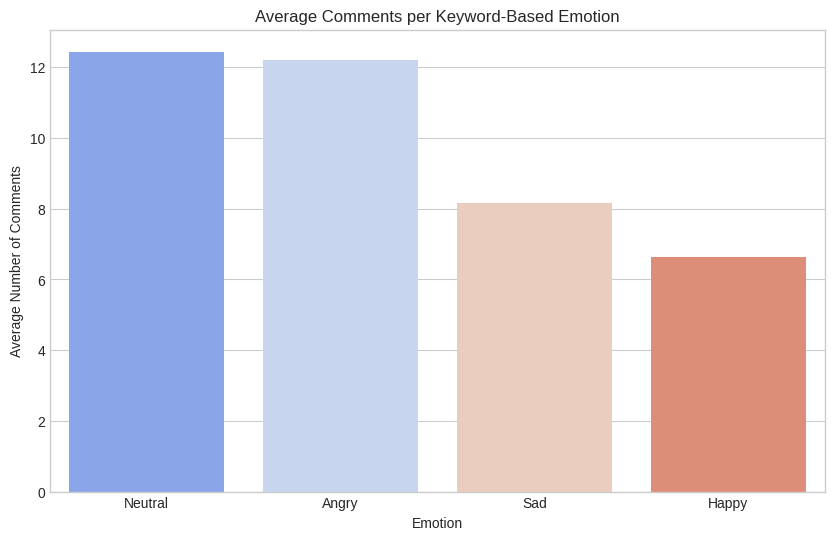

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset
df = pd.read_csv('/kaggle/input/kuet-whispers/whispers.csv')

# --- Keyword-Based Sentiment Analysis ---

# Define keywords for each emotion
emotion_keywords = {
    'Happy': ['love', 'happy', 'amazing', 'beautiful', 'great', 'joy', 'excited', 'wonderful', 'thanks', 'congratulations'],
    'Sad': ['sad', 'miss', 'cry', 'alone', 'sorry', 'lost', 'tears', 'heartbroken', 'lonely', 'pain'],
    'Angry': ['angry', 'hate', 'frustrated', 'annoyed', 'mad', 'irritated', 'pissed', 'furious']
}

# Function to categorize text based on keywords
def get_emotion_from_keywords(text):
    text_lower = text.lower()
    emotion_scores = { 'Happy': 0, 'Sad': 0, 'Angry': 0 }

    # Count keywords for each emotion
    for emotion, keywords in emotion_keywords.items():
        for keyword in keywords:
            # Use regex to find whole words to avoid matching substrings (e.g., 'mad' in 'made')
            emotion_scores[emotion] += len(re.findall(r'\b' + keyword + r'\b', text_lower))

    # Determine the dominant emotion by the highest score
    max_score = 0
    dominant_emotion = 'Neutral'
    for emotion, score in emotion_scores.items():
        if score > max_score:
            max_score = score
            dominant_emotion = emotion

    # If scores are tied (e.g., 1 happy, 1 sad) or no keywords are found, classify as Neutral
    if list(emotion_scores.values()).count(max_score) > 1:
        return 'Neutral'

    return dominant_emotion

# Apply the function to the 'cleaned_text' column
df['emotion'] = df['cleaned_text'].apply(get_emotion_from_keywords)

# --- Analysis and Visualization ---

# Group by the new emotion category and calculate average engagement
engagement_by_emotion = df.groupby('emotion')[['likes', 'comments']].mean().reset_index()

# For a more reliable analysis, filter out categories that have very few posts
emotion_counts = df['emotion'].value_counts()
# We'll only consider emotions that appeared in more than 5 posts
meaningful_emotions = emotion_counts[emotion_counts > 5].index
engagement_by_emotion = engagement_by_emotion[engagement_by_emotion['emotion'].isin(meaningful_emotions)]

# Sort the data for clearer plotting
engagement_by_emotion_likes = engagement_by_emotion.sort_values('likes', ascending=False)
engagement_by_emotion_comments = engagement_by_emotion.sort_values('comments', ascending=False)

# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')

# Bar plot for average likes per emotion
plt.figure(figsize=(10, 6))
sns.barplot(x='emotion', y='likes', data=engagement_by_emotion_likes, palette='Spectral')
plt.title('Average Likes per Keyword-Based Emotion')
plt.xlabel('Emotion')
plt.ylabel('Average Number of Likes')
plt.savefig('avg_likes_per_keyword_emotion.png')

# Bar plot for average comments per emotion
plt.figure(figsize=(10, 6))
sns.barplot(x='emotion', y='comments', data=engagement_by_emotion_comments, palette='coolwarm')
plt.title('Average Comments per Keyword-Based Emotion')
plt.xlabel('Emotion')
plt.ylabel('Average Number of Comments')
plt.savefig('avg_comments_per_keyword_emotion.png')

print("Keyword-based sentiment analysis complete.")

Analysis of happy and engaged hours complete.

Number of Happy Posts per Hour:
    hour  post_count
0      1           2
1      2           2
2      3          10
3      4          11
4      5          27
5      6          30
6      7          22
7      8          14
8      9          14
9     10           7
10    11          14
11    12          18
12    13          28
13    14          20
14    15          30
15    16          38
16    17          29
17    18          17
18    19          14
19    20          11
20    21           4
21    22           4
22    23           8

Engagement on Happy Posts per Hour:
    hour      likes   comments
0      1  10.500000   0.500000
1      2  44.500000   4.500000
2      3  55.000000   7.600000
3      4  62.454545   5.818182
4      5  65.740741   6.740741
5      6  54.500000   6.566667
6      7  57.500000  11.090909
7      8  58.285714   7.000000
8      9  35.142857   4.071429
9     10  94.857143   3.857143
10    11  39.357143   8.714286
11    12

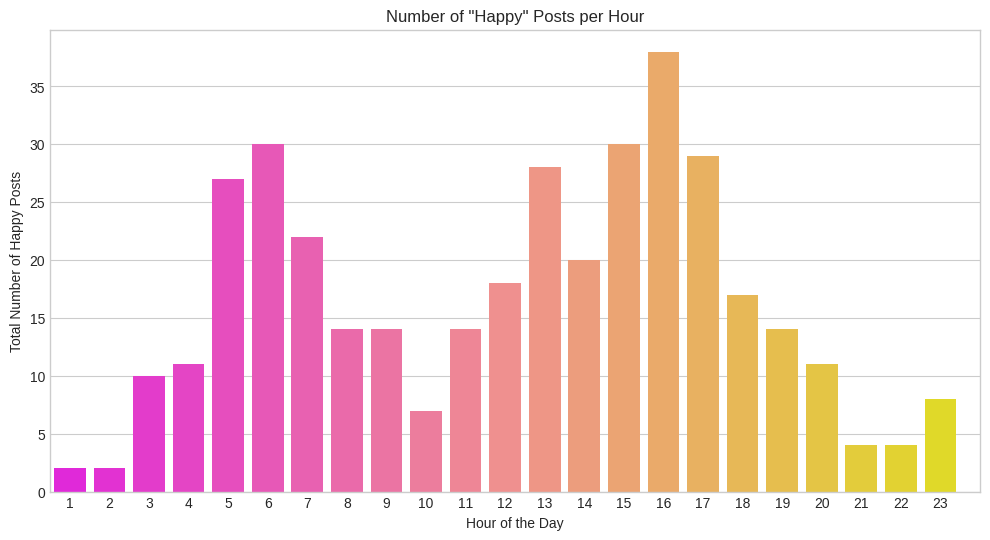

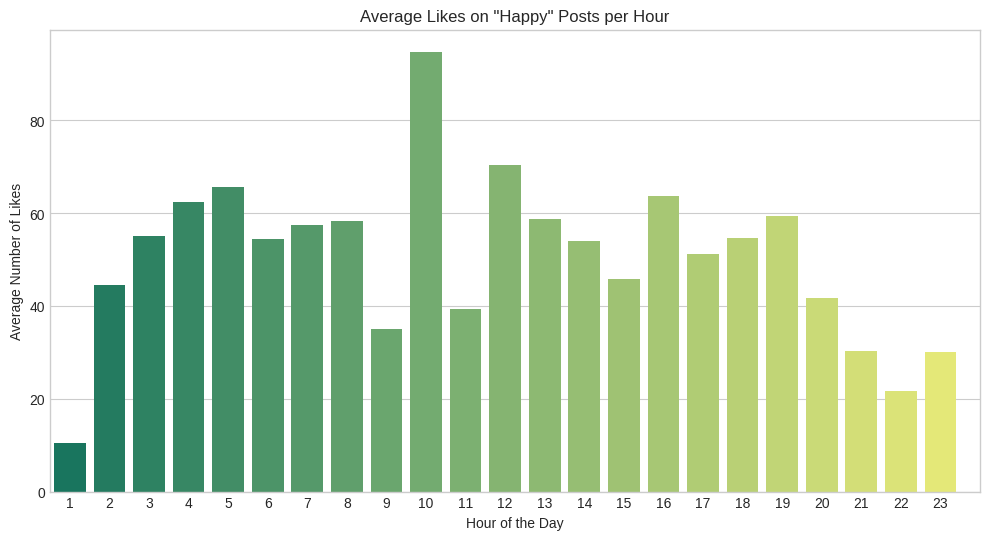

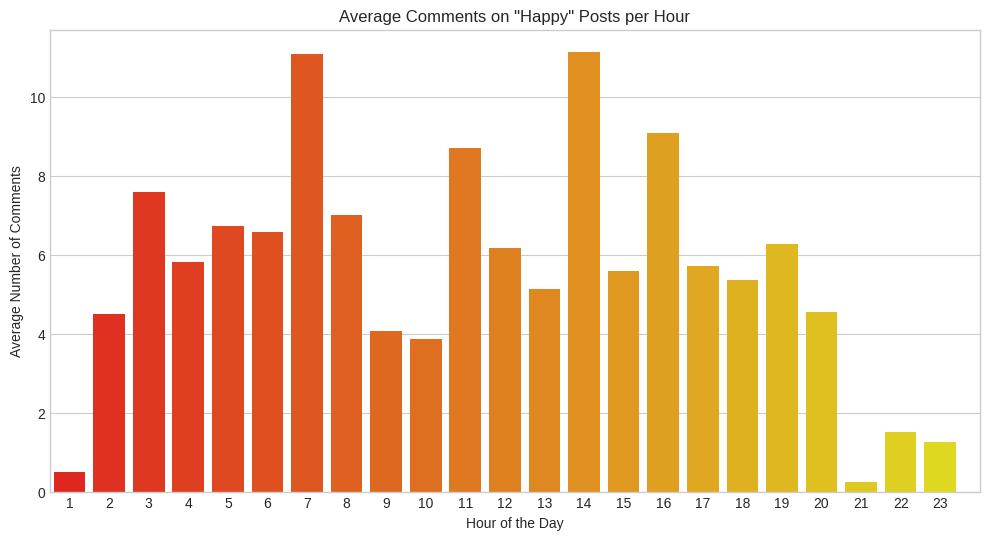

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset
df = pd.read_csv('/kaggle/input/kuet-whispers/whispers.csv')

# --- Keyword-Based Emotion Identification ---

# Define keywords for the 'Happy' emotion
happy_keywords = ['love', 'happy', 'amazing', 'beautiful', 'great', 'joy', 'excited', 'wonderful', 'thanks', 'congratulations']

# Function to check if a post is 'Happy'
def is_happy(text):
    text_lower = text.lower()
    for keyword in happy_keywords:
        if re.search(r'\b' + keyword + r'\b', text_lower):
            return True
    return False

# Apply the function to create a boolean mask for happy posts
df['is_happy'] = df['cleaned_text'].apply(is_happy)

# Create a new DataFrame containing only the happy posts
happy_df = df[df['is_happy']].copy()

# --- Analysis of Happy Posts by Hour ---

# Convert 'time' column to datetime and extract the hour
happy_df['time'] = pd.to_datetime(happy_df['time'])
happy_df['hour'] = happy_df['time'].dt.hour

# 1. Count the number of happy posts per hour
happy_posts_per_hour = happy_df.groupby('hour').size().reset_index(name='post_count')

# 2. Calculate average engagement on happy posts per hour
happy_engagement_per_hour = happy_df.groupby('hour')[['likes', 'comments']].mean().reset_index()


# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')

# Plot 1: Number of Happy Posts per Hour
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='post_count', data=happy_posts_per_hour, palette='spring')
plt.title('Number of "Happy" Posts per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Number of Happy Posts')
plt.xticks(range(24))
plt.savefig('happy_posts_distribution_per_hour.png')

# Plot 2: Average Likes on Happy Posts per Hour
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='likes', data=happy_engagement_per_hour, palette='summer')
plt.title('Average Likes on "Happy" Posts per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Likes')
plt.xticks(range(24))
plt.savefig('happy_posts_likes_per_hour.png')

# Plot 3: Average Comments on Happy Posts per Hour
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='comments', data=happy_engagement_per_hour, palette='autumn')
plt.title('Average Comments on "Happy" Posts per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Comments')
plt.xticks(range(24))
plt.savefig('happy_posts_comments_per_hour.png')


print("Analysis of happy and engaged hours complete.")
print("\nNumber of Happy Posts per Hour:")
print(happy_posts_per_hour.to_string())
print("\nEngagement on Happy Posts per Hour:")
print(happy_engagement_per_hour.to_string())
print("\nPlots generated successfully: happy_posts_distribution_per_hour.png, happy_posts_likes_per_hour.png, happy_posts_comments_per_hour.png")

Analysis of post length vs. engagement and emotion is complete.

Average Post Length by Emotion:
   emotion  post_length
3      Sad   148.388060
0    Angry   139.725000
1    Happy   131.531034
2  Neutral    64.717503

Three plots have been generated: post_length_vs_likes.png, post_length_vs_comments.png, avg_post_length_by_emotion.png


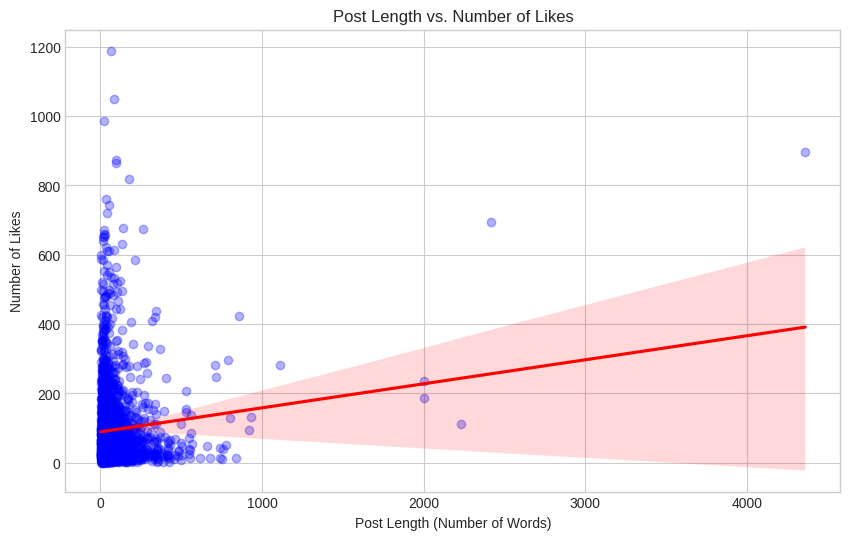

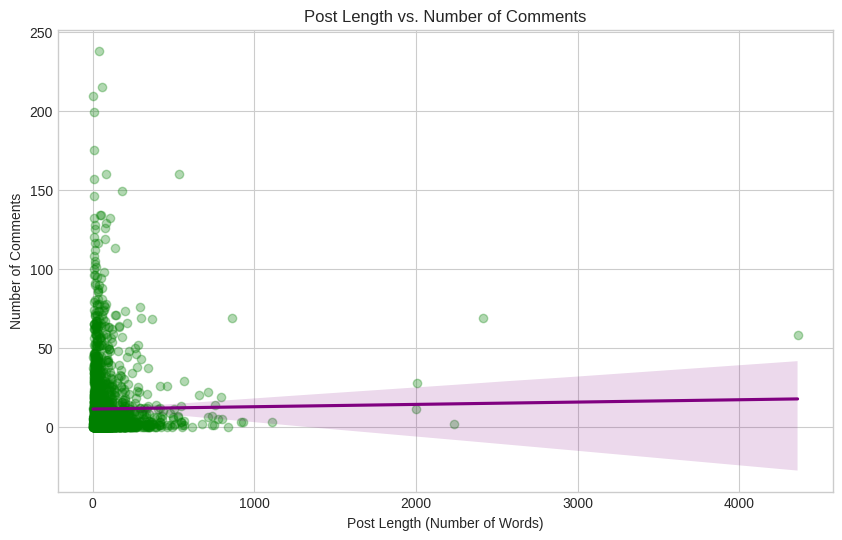

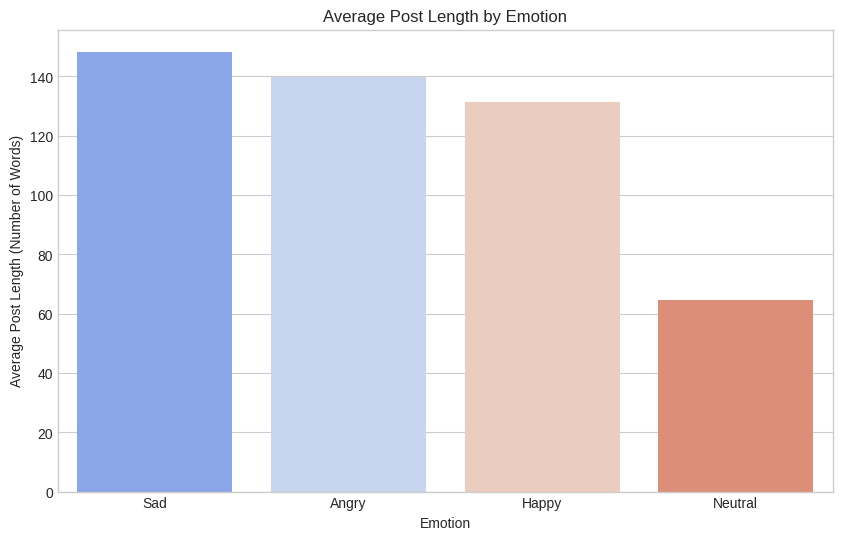

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset
df = pd.read_csv('/kaggle/input/kuet-whispers/whispers.csv')

# --- 1. Calculate Post Length ---
# We'll calculate the length based on the number of words in the cleaned_text
df['post_length'] = df['cleaned_text'].str.split().str.len()

# --- 2. Determine Emotion (Keyword-Based Method) ---
emotion_keywords = {
    'Happy': ['love', 'happy', 'amazing', 'beautiful', 'great', 'joy', 'excited', 'wonderful', 'thanks', 'congratulations'],
    'Sad': ['sad', 'miss', 'cry', 'alone', 'sorry', 'lost', 'tears', 'heartbroken', 'lonely', 'pain'],
    'Angry': ['angry', 'hate', 'frustrated', 'annoyed', 'mad', 'irritated', 'pissed', 'furious']
}

def get_emotion_from_keywords(text):
    text_lower = text.lower()
    emotion_scores = { 'Happy': 0, 'Sad': 0, 'Angry': 0 }
    for emotion, keywords in emotion_keywords.items():
        for keyword in keywords:
            emotion_scores[emotion] += len(re.findall(r'\b' + keyword + r'\b', text_lower))
    max_score = 0
    dominant_emotion = 'Neutral'
    for emotion, score in emotion_scores.items():
        if score > max_score:
            max_score = score
            dominant_emotion = emotion
    if list(emotion_scores.values()).count(max_score) > 1:
        return 'Neutral'
    return dominant_emotion

df['emotion'] = df['cleaned_text'].apply(get_emotion_from_keywords)


# --- 3. Visualization and Analysis ---

plt.style.use('seaborn-v0_8-whitegrid')

# Plot 1: Post Length vs. Likes
plt.figure(figsize=(10, 6))
# Using a regression plot to better visualize the trend
sns.regplot(x='post_length', y='likes', data=df,
            scatter_kws={'alpha':0.3, 'color':'blue'},
            line_kws={'color':'red'})
plt.title('Post Length vs. Number of Likes')
plt.xlabel('Post Length (Number of Words)')
plt.ylabel('Number of Likes')
plt.savefig('post_length_vs_likes.png')

# Plot 2: Post Length vs. Comments
plt.figure(figsize=(10, 6))
sns.regplot(x='post_length', y='comments', data=df,
            scatter_kws={'alpha':0.3, 'color':'green'},
            line_kws={'color':'purple'})
plt.title('Post Length vs. Number of Comments')
plt.xlabel('Post Length (Number of Words)')
plt.ylabel('Number of Comments')
plt.savefig('post_length_vs_comments.png')


# Analysis for "if big texts are happy or smaller ones"
# Group by emotion and calculate the average post length
avg_length_by_emotion = df.groupby('emotion')['post_length'].mean().reset_index().sort_values('post_length', ascending=False)

# Plot 3: Average Post Length by Emotion
plt.figure(figsize=(10, 6))
sns.barplot(x='emotion', y='post_length', data=avg_length_by_emotion, palette='coolwarm')
plt.title('Average Post Length by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Average Post Length (Number of Words)')
plt.savefig('avg_post_length_by_emotion.png')

print("Analysis of post length vs. engagement and emotion is complete.")
print("\nAverage Post Length by Emotion:")
print(avg_length_by_emotion.to_string())
print("\nThree plots have been generated: post_length_vs_likes.png, post_length_vs_comments.png, avg_post_length_by_emotion.png")

We remove the outliers.now

Analysis with outliers removed is complete.
The dataset now has 1932 rows after filtering.

Average Post Length by Emotion (Outliers Removed):
   emotion  post_length
0    Angry    98.074074
3      Sad    89.669065
1    Happy    89.049550
2  Neutral    42.408679

New plots generated: length_vs_likes_no_outliers.png, length_vs_comments_no_outliers.png, avg_length_by_emotion_no_outliers.png


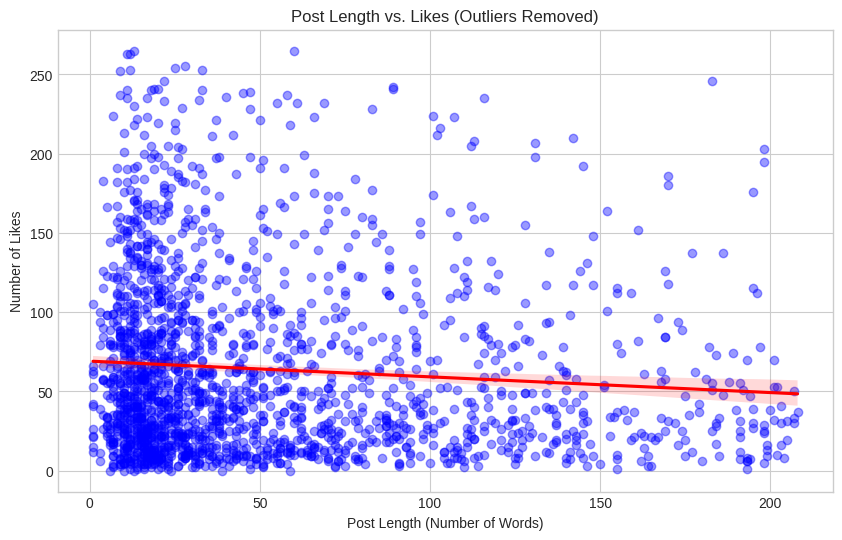

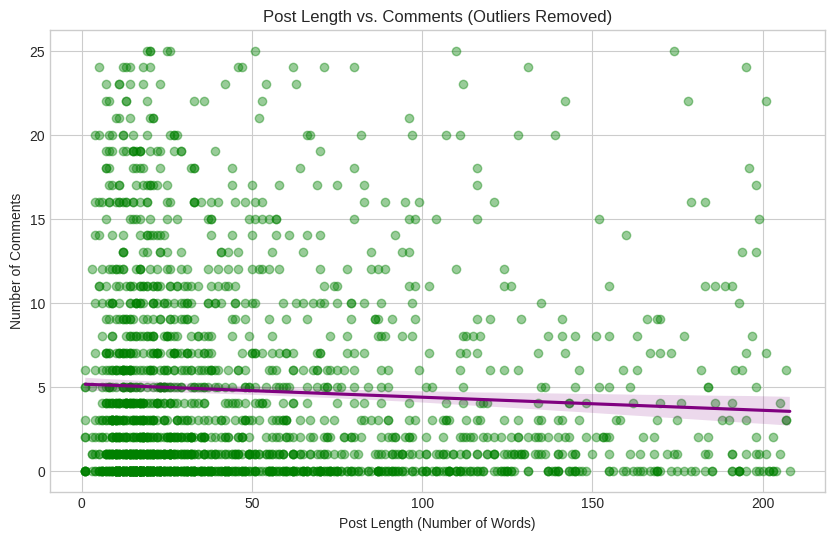

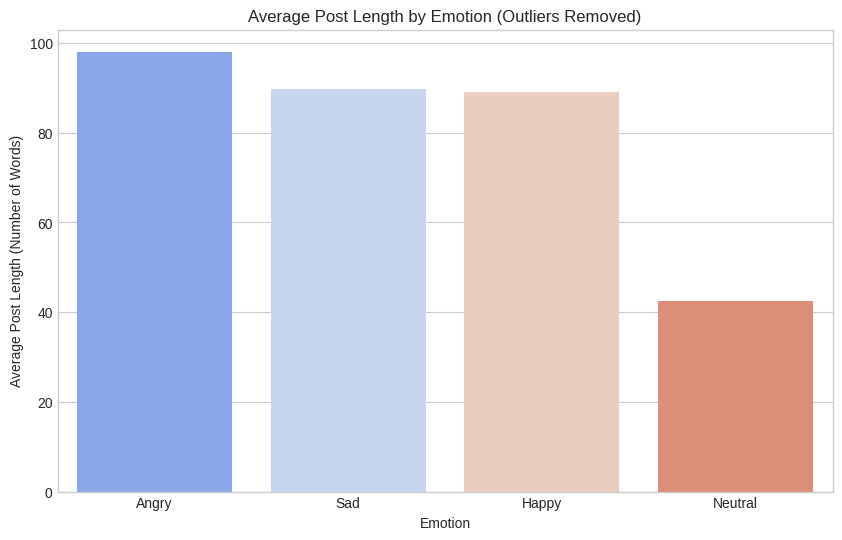

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

# Load the dataset
df = pd.read_csv('/kaggle/input/kuet-whispers/whispers.csv')

# --- 1. Calculate Post Length ---
df['post_length'] = df['cleaned_text'].str.split().str.len()
# Drop rows where post_length is NaN, which can happen if 'cleaned_text' is empty
df.dropna(subset=['post_length'], inplace=True)


# --- 2. Remove Outliers using the IQR method ---
cols_to_check = ['likes', 'comments', 'post_length']
for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the dataframe, removing outliers for the current column
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


# --- 3. Determine Emotion using Keyword-Based Method on the filtered data ---
emotion_keywords = {
    'Happy': ['love', 'happy', 'amazing', 'beautiful', 'great', 'joy', 'excited', 'wonderful', 'thanks', 'congratulations'],
    'Sad': ['sad', 'miss', 'cry', 'alone', 'sorry', 'lost', 'tears', 'heartbroken', 'lonely', 'pain'],
    'Angry': ['angry', 'hate', 'frustrated', 'annoyed', 'mad', 'irritated', 'pissed', 'furious']
}

def get_emotion_from_keywords(text):
    text_lower = text.lower()
    emotion_scores = { 'Happy': 0, 'Sad': 0, 'Angry': 0 }
    for emotion, keywords in emotion_keywords.items():
        for keyword in keywords:
            emotion_scores[emotion] += len(re.findall(r'\b' + keyword + r'\b', text_lower))
    max_score = 0
    dominant_emotion = 'Neutral'
    for emotion, score in emotion_scores.items():
        if score > max_score:
            max_score = score
            dominant_emotion = emotion
    if list(emotion_scores.values()).count(max_score) > 1:
        return 'Neutral'
    return dominant_emotion

df['emotion'] = df['cleaned_text'].apply(get_emotion_from_keywords)


# --- 4. Visualization on the Cleaned Data ---
plt.style.use('seaborn-v0_8-whitegrid')

# Plot 1: Post Length vs. Likes (No Outliers)
plt.figure(figsize=(10, 6))
sns.regplot(x='post_length', y='likes', data=df,
            scatter_kws={'alpha':0.4, 'color':'blue'},
            line_kws={'color':'red'})
plt.title('Post Length vs. Likes (Outliers Removed)')
plt.xlabel('Post Length (Number of Words)')
plt.ylabel('Number of Likes')
plt.savefig('length_vs_likes_no_outliers.png')

# Plot 2: Post Length vs. Comments (No Outliers)
plt.figure(figsize=(10, 6))
sns.regplot(x='post_length', y='comments', data=df,
            scatter_kws={'alpha':0.4, 'color':'green'},
            line_kws={'color':'purple'})
plt.title('Post Length vs. Comments (Outliers Removed)')
plt.xlabel('Post Length (Number of Words)')
plt.ylabel('Number of Comments')
plt.savefig('length_vs_comments_no_outliers.png')


# Plot 3: Average Post Length by Emotion (No Outliers)
avg_length_by_emotion = df.groupby('emotion')['post_length'].mean().reset_index().sort_values('post_length', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='emotion', y='post_length', data=avg_length_by_emotion, palette='coolwarm')
plt.title('Average Post Length by Emotion (Outliers Removed)')
plt.xlabel('Emotion')
plt.ylabel('Average Post Length (Number of Words)')
plt.savefig('avg_length_by_emotion_no_outliers.png')

print("Analysis with outliers removed is complete.")
print(f"The dataset now has {len(df)} rows after filtering.")
print("\nAverage Post Length by Emotion (Outliers Removed):")
print(avg_length_by_emotion.to_string())
print("\nNew plots generated: length_vs_likes_no_outliers.png, length_vs_comments_no_outliers.png, avg_length_by_emotion_no_outliers.png")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Analysis of Likes-to-Comments Ratio is complete.
The 95th percentile for the ratio is: 61.00

--- Top 5 Most Passive Posts (High Likes, Low Comments) ---

Post Text: আর ১৫, ১৬, ১৭, ১৮ র মতো ১৯ কোনো ২০ র গায়ে হাত তুলতনা বলে নাকি ১৭ এর ওই শুয়োরের বাচ্চাই আমাদেরকে বলত "রশীদ হলের ইতিহাসে ১৯ এর মতো কোনো বোকাচোদা ব্যাচ আসেনি" সাথে আরও কতো আজাব। বুকে হাত রেখে বলতে পারব র...
Likes: 351, Comments: 0.0, Ratio: 351.00

Post Text: জ্বালা তরুণ, আগুন জ্বালা আধাঁর পেরিয়ে আলোর ছটা ভাঙবে শাসন, পুড়বে ভিটা জ্বালা ন্যায়ের নিশান জ্বালা!...
Likes: 279, Comments: 0.0, Ratio: 279.00

Post Text: In my initial days at KUET, just outside the central library(rental one),I was tying my shoelaces. That day, we were issued our library card for the first time and there was quite a crowd even of the ...
Likes: 224, Comments: 0.0, Ratio: 224.00

Post Text: আন্ডারগ্রাজুয়েটে এসেও বাড়ি থেকে বার বার টাকা চাওয়ার মত পেইনফুল বিষয় বুঝি দ্বিতীয়টি আর নেই। -anonymous...
Likes: 212, Comments: 0.0, Ratio: 212.00

Post Text: অনেকদিন

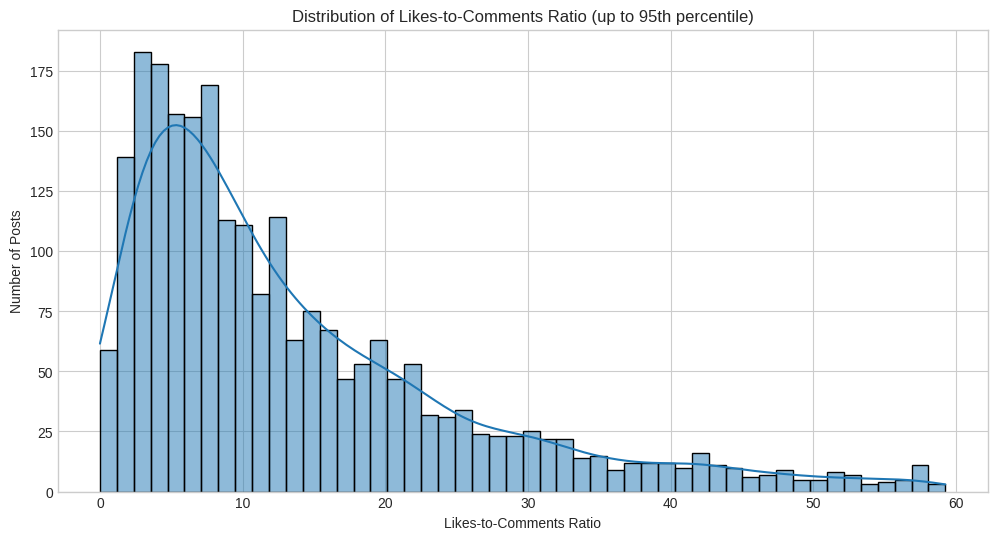

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('/kaggle/input/kuet-whispers/whispers.csv')

# --- 1. Calculate the Likes-to-Comments Ratio ---
# To avoid division by zero, we add 1 to the comments.
# This way, a post with 0 comments has a ratio equal to its likes, representing pure passive agreement.
df['l_to_c_ratio'] = df['likes'] / (df['comments'] + 1)


# --- 2. Visualize the Ratio Distribution ---
# The ratio can have extreme outliers, so we'll cap it for a more readable histogram.
# We'll look at the distribution for ratios up to the 95th percentile.
ratio_cap = df['l_to_c_ratio'].quantile(0.95)
plt.figure(figsize=(12, 6))
sns.histplot(df[df['l_to_c_ratio'] < ratio_cap]['l_to_c_ratio'], bins=50, kde=True)
plt.title('Distribution of Likes-to-Comments Ratio (up to 95th percentile)')
plt.xlabel('Likes-to-Comments Ratio')
plt.ylabel('Number of Posts')
plt.savefig('likes_to_comments_ratio_hist.png')


# --- 3. Identify Top Posts by Engagement Type ---

# Top 5 Most Passive Posts (Highest Ratio)
# These are posts with many likes relative to their comments.
top_passive_posts = df.sort_values('l_to_c_ratio', ascending=False).head(5)

# Top 5 Most Active Posts (Lowest Ratio)
# We need to filter for posts that have at least one comment to find true "discussion".
df_with_comments = df[df['comments'] > 0].copy()
top_active_posts = df_with_comments.sort_values('l_to_c_ratio', ascending=True).head(5)


# --- 4. Present the Results ---
print("Analysis of Likes-to-Comments Ratio is complete.")
print(f"The 95th percentile for the ratio is: {ratio_cap:.2f}")

print("\n--- Top 5 Most Passive Posts (High Likes, Low Comments) ---")
for index, row in top_passive_posts.iterrows():
    print(f"\nPost Text: {row['cleaned_text'][:200]}...") # Print first 200 chars
    print(f"Likes: {row['likes']}, Comments: {row['comments']}, Ratio: {row['l_to_c_ratio']:.2f}")

print("\n\n--- Top 5 Most Active Discussion Posts (Low Likes, High Comments) ---")
for index, row in top_active_posts.iterrows():
    print(f"\nPost Text: {row['cleaned_text'][:200]}...") # Print first 200 chars
    print(f"Likes: {row['likes']}, Comments: {row['comments']}, Ratio: {row['l_to_c_ratio']:.2f}")
    
print("\n\nPlot generated: likes_to_comments_ratio_hist.png")

calmap not found. Attempting to install...
Installation successful.


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Calendar heatmap generated successfully: calendar_heatmap.png


<Figure size 1600x800 with 0 Axes>

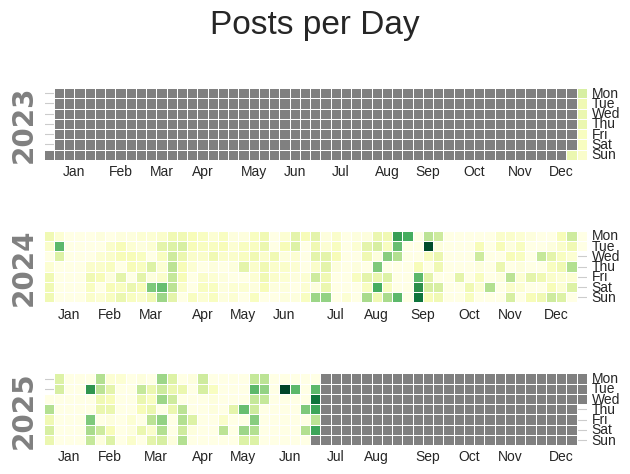

In [10]:
import subprocess
import sys

# Attempt to install calmap
try:
    import calmap
except ImportError:
    print("calmap not found. Attempting to install...")
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "calmap"])
        print("Installation successful.")
        import calmap
    except Exception as e:
        print(f"Failed to install calmap: {e}")
        calmap = None

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/input/kuet-whispers/whispers.csv')

# Prepare the data
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Resample to get the count of posts per day
daily_counts = df['text'].resample('D').count()


if calmap:
    # --- Generate Calendar Heatmap ---
    plt.figure(figsize=(16, 8))
    calmap.calendarplot(daily_counts, cmap='YlGn', fillcolor='grey', linewidth=0.5, yearlabel_kws={'fontsize': 20})
    plt.suptitle('Posts per Day', fontsize=24, y=1.02)
    plt.savefig('calendar_heatmap.png')
    print("Calendar heatmap generated successfully: calendar_heatmap.png")
else:
    # --- Alternative Visualization: Line Chart ---
    print("Could not generate calendar heatmap. Creating a line chart of posts per day instead.")
    plt.figure(figsize=(16, 6))
    daily_counts.plot(kind='line')
    plt.title('Number of Posts per Day')
    plt.xlabel('Date')
    plt.ylabel('Number of Posts')
    plt.grid(True)
    plt.savefig('posts_per_day_line_chart.png')
    print("Alternative line chart generated: posts_per_day_line_chart.png")

/tmp/ipykernel_13/2569677044.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_data['emotion_code'] = calendar_data['dominant_emotion'].map(emotion_map)


Emotion Calendar Heatmap generated successfully.


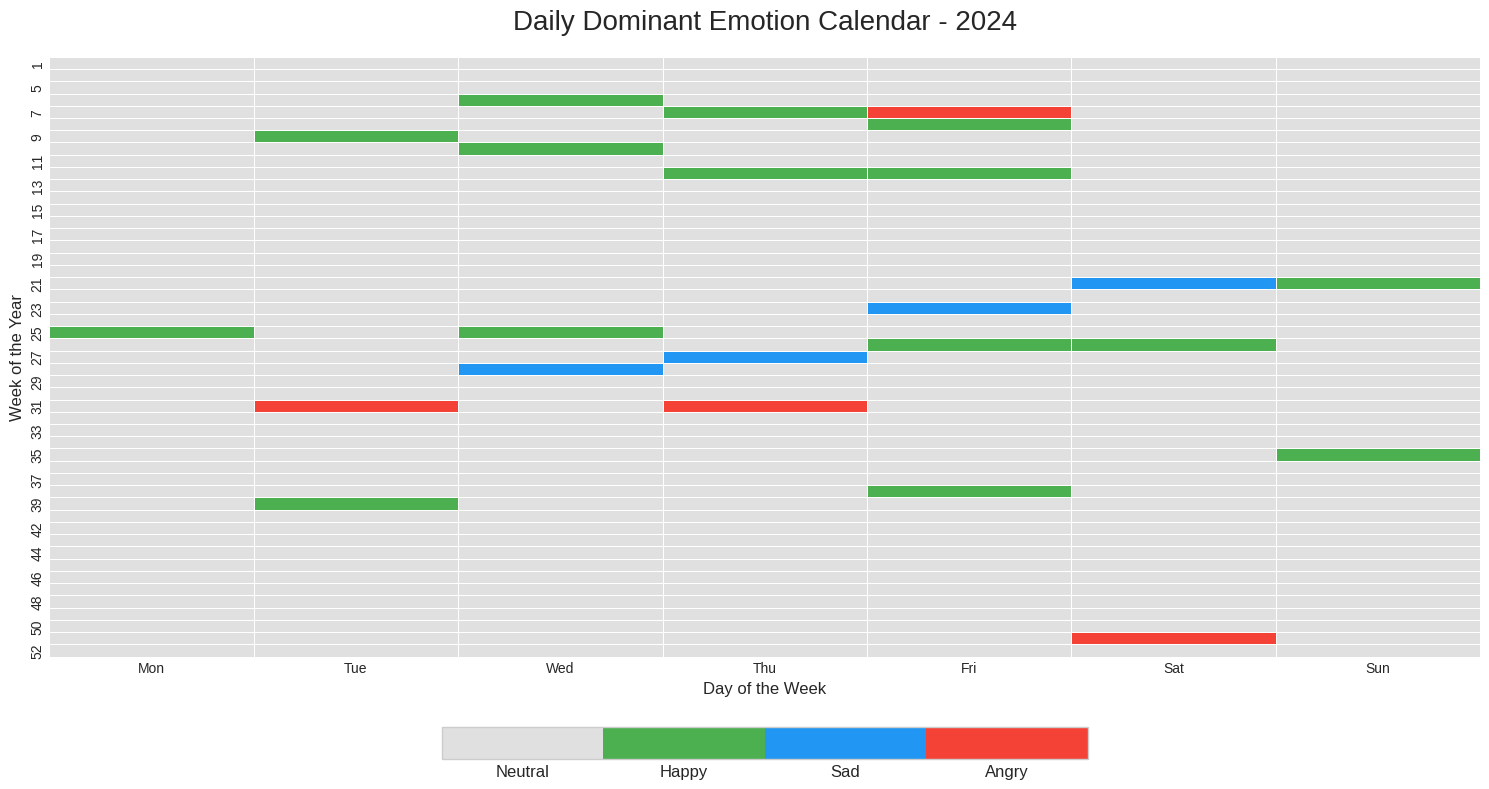

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset
df = pd.read_csv('/kaggle/input/kuet-whispers/whispers.csv')

# --- 1. Determine Emotion for Each Post ---
emotion_keywords = {
    'Happy': ['love', 'happy', 'amazing', 'beautiful', 'great', 'joy', 'excited', 'wonderful', 'thanks', 'congratulations'],
    'Sad': ['sad', 'miss', 'cry', 'alone', 'sorry', 'lost', 'tears', 'heartbroken', 'lonely', 'pain'],
    'Angry': ['angry', 'hate', 'frustrated', 'annoyed', 'mad', 'irritated', 'pissed', 'furious']
}

def get_emotion_from_keywords(text):
    text_lower = text.lower()
    emotion_scores = {emotion: 0 for emotion in emotion_keywords}
    for emotion, keywords in emotion_keywords.items():
        for keyword in keywords:
            emotion_scores[emotion] += len(re.findall(r'\b' + keyword + r'\b', text_lower))
    
    max_score = 0
    dominant_emotion = 'Neutral'
    is_tie = False
    for emotion, score in emotion_scores.items():
        if score > max_score:
            max_score = score
            dominant_emotion = emotion
            is_tie = False
        elif score == max_score and max_score > 0:
            is_tie = True

    if is_tie or max_score == 0:
        return 'Neutral'
    return dominant_emotion

df['emotion'] = df['cleaned_text'].apply(get_emotion_from_keywords)
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date

# --- 2. Find Dominant Emotion for Each Day ---
daily_emotion_counts = df.groupby(['date', 'emotion']).size().unstack(fill_value=0)
daily_dominant_emotion = daily_emotion_counts.idxmax(axis=1).reset_index(name='dominant_emotion')
daily_dominant_emotion['date'] = pd.to_datetime(daily_dominant_emotion['date'])

# --- 3. Prepare Data for Heatmap Grid ---
daily_dominant_emotion['day_of_week'] = daily_dominant_emotion['date'].dt.dayofweek
daily_dominant_emotion['week_of_year'] = daily_dominant_emotion['date'].dt.isocalendar().week
daily_dominant_emotion['year'] = daily_dominant_emotion['date'].dt.year

target_year = daily_dominant_emotion['year'].mode()[0]
calendar_data = daily_dominant_emotion[daily_dominant_emotion['year'] == target_year]

emotion_map = {'Neutral': 0, 'Happy': 1, 'Sad': 2, 'Angry': 3}
calendar_data['emotion_code'] = calendar_data['dominant_emotion'].map(emotion_map)

heatmap_data = calendar_data.pivot_table(values='emotion_code', index='week_of_year', columns='day_of_week', fill_value=-1)

# --- 4. Generate the Heatmap ---
fig, ax = plt.subplots(figsize=(15, 8))
colors = ['#E0E0E0', '#4CAF50', '#2196F3', '#F44336']
labels = ['Neutral', 'Happy', 'Sad', 'Angry']
cmap = plt.cm.colors.ListedColormap(colors)
bounds = [-0.5, 0.5, 1.5, 2.5, 3.5]
norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

sns.heatmap(heatmap_data, cmap=cmap, norm=norm, linewidths=.5, linecolor='white', cbar=False, ax=ax)

cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, ticks=[0, 1, 2, 3], orientation='horizontal', fraction=0.046, pad=0.1)
cbar.ax.set_xticklabels(labels)
cbar.ax.tick_params(labelsize=12)

ax.set_title(f'Daily Dominant Emotion Calendar - {target_year}', fontsize=20, pad=20)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax.set_xlabel('Day of the Week', fontsize=12)
ax.set_ylabel('Week of the Year', fontsize=12)
plt.tight_layout()
plt.savefig('emotion_calendar_heatmap.png')

print("Emotion Calendar Heatmap generated successfully.")

joypy not found. Attempting to install...
Installation successful.


/tmp/ipykernel_13/1074822920.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sender'].fillna('anonymous', inplace=True)
/usr/local/lib/python3.11/dist-packages/joypy/joyplot.py:582: UserWarning: Glyph 2476 (\N{BENGALI LETTER BA}) missing from current font.
  fig.tight_layout(h_pad=h_pad)
/usr/local/lib/python3.11/dist-packages/joypy/joyplot.py:582: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.tight_layout(h_pad=h_pad)
/usr/local/lib/python3.11/dist-packages/joypy/joyplot.py:582: UserWarni

Displaying engagement distributions for top senders: ["anonymous('23)", "anonymous(EEE'22)", "limerant (ME'23)", "anonymous('22)", 'বেনামী']
Ridgeline plot generated successfully: ridgeline_plot_likes.png


/tmp/ipykernel_13/1074822920.py:54: UserWarning: Glyph 2476 (\N{BENGALI LETTER BA}) missing from current font.
  plt.savefig('ridgeline_plot_likes.png')
/tmp/ipykernel_13/1074822920.py:54: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.savefig('ridgeline_plot_likes.png')
/tmp/ipykernel_13/1074822920.py:54: UserWarning: Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from current font.
  plt.savefig('ridgeline_plot_likes.png')
/tmp/ipykernel_13/1074822920.py:54: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from current font.
  plt.savefig('ridgeline_plot_likes.png')
/tmp/ipykernel_13/1074822920.py:54: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from current font.
  plt.savefig('ridgeline_plot_likes.png')
/tmp/ipykernel_13/1074822920.py:54: UserWarning: Glyph 2478 (\N{BENGALI LETTER MA}) missing from current font.
  plt.savefig('ridgeline_plot_likes.png')
/tmp/ipykernel_13/1074822920.py:54: UserWarning: Glyph 2496 (\N{BENGALI VOWEL SIG

<Figure size 1200x800 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2476 (\N{BENGALI LETTER BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/p

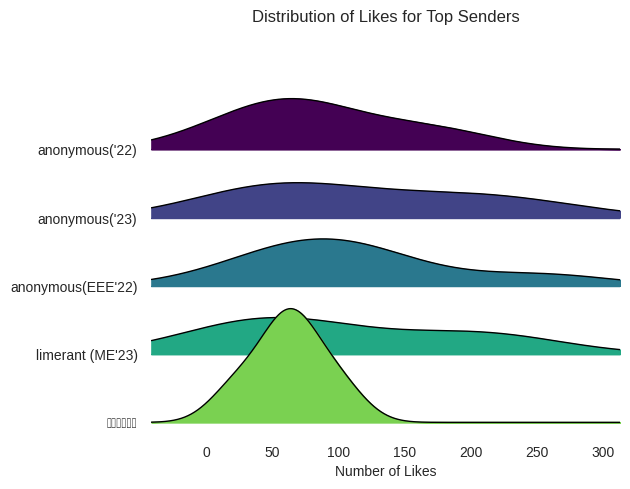

In [12]:
import subprocess
import sys

# Attempt to install joypy
try:
    import joypy
except ImportError:
    print("joypy not found. Attempting to install...")
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "joypy"])
        print("Installation successful.")
        import joypy
    except Exception as e:
        print(f"Failed to install joypy: {e}")
        joypy = None

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/input/kuet-whispers/whispers.csv')

# --- 1. Data Preparation ---
# Fill missing sender values and filter out 'anonymous'
df['sender'].fillna('anonymous', inplace=True)
named_senders_df = df[df['sender'].str.lower() != 'anonymous']

# Identify the top 5 named senders by post count
top_senders = named_senders_df['sender'].value_counts().nlargest(5).index

# Filter the dataframe to include only posts from these top senders
top_senders_df = named_senders_df[named_senders_df['sender'].isin(top_senders)]

# Remove outliers from the 'likes' column to make the plot readable
Q1 = top_senders_df['likes'].quantile(0.25)
Q3 = top_senders_df['likes'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
filtered_top_senders_df = top_senders_df[top_senders_df['likes'] <= upper_bound]

print(f"Displaying engagement distributions for top senders: {list(top_senders)}")

# --- 2. Generate Plot ---
if joypy:
    # --- Generate Ridgeline Plot ---
    plt.figure(figsize=(12, 8))
    fig, axes = joypy.joyplot(filtered_top_senders_df, by='sender', column='likes',
                              colormap=plt.cm.viridis,
                              title='Distribution of Likes for Top Senders',
                              linewidth=1,
                              legend=False)
    plt.xlabel('Number of Likes')
    plt.savefig('ridgeline_plot_likes.png')
    print("Ridgeline plot generated successfully: ridgeline_plot_likes.png")

else:
    # --- Alternative: Generate Violin Plot ---
    print("Could not generate Ridgeline Plot. Creating a Violin Plot instead.")
    plt.figure(figsize=(14, 8))
    sns.violinplot(x='sender', y='likes', data=filtered_top_senders_df,
                   order=top_senders, # Keep the order of top senders
                   palette='viridis',
                   cut=0, # Trim the tails
                   inner='quartile') # Show quartiles inside the violins
    plt.title('Distribution of Likes for Top Senders', fontsize=16)
    plt.xlabel('Sender', fontsize=12)
    plt.ylabel('Number of Likes', fontsize=12)
    plt.xticks(rotation=10)
    plt.savefig('violin_plot_likes.png')
    print("Alternative Violin Plot generated: violin_plot_likes.png")

/tmp/ipykernel_13/4183120092.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_senders['likes_capped'] = df_top_senders['likes'].clip(upper=likes_cap)
/tmp/ipykernel_13/4183120092.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=plt.cm.get_cmap('autumn_r'),
/usr/local/lib/python3.11/dist-packages/joypy/joyplot.py:582: UserWarning: Glyph 2474 (\N{BENGALI LETTER PA}) missing from current font.
  fig.tight_layout(h_pad=h_pad)
/usr/local/lib/python3.11/dist-packages/joypy/joyplot.py:582: UserWarning: Matplotlib currently does not support Bengali natively.
  

Ridgeline plot generated successfully: ridgeline_plot.png


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2474 (\N{BENGALI LETTER PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2504 (\N{BENGALI VOWEL SIGN AI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2468 (\N{BENGALI LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2509 (\N{BENGALI SIGN VIRAMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/py

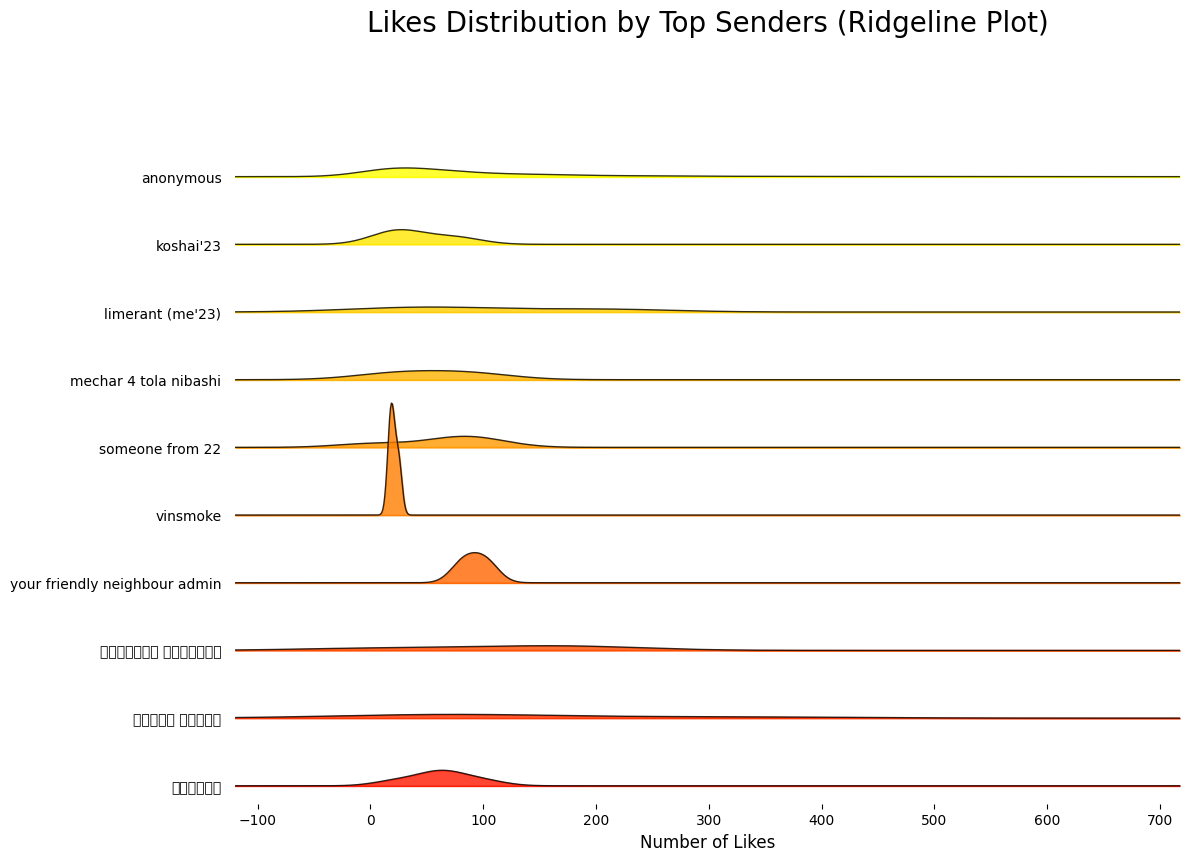

In [13]:
import subprocess
import sys

# Attempt to install joypy
try:
    import joypy
except ImportError:
    print("joypy not found. Attempting to install...")
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "joypy"])
        print("Installation successful.")
        import joypy
    except Exception as e:
        print(f"Failed to install joypy: {e}")
        joypy = None

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('/kaggle/input/kuet-whispers/whispers.csv')
df.dropna(subset=['sender'], inplace=True) # Drop posts with no sender

# --- 1. Prepare the Data ---
# Normalize sender names (lowercase, remove common prefixes/suffixes)
df['sender_normalized'] = df['sender'].str.lower().str.strip().str.replace('~', '', regex=False)
# Group common anonymous variations
df.loc[df['sender_normalized'].str.contains('anonymous', na=False), 'sender_normalized'] = 'anonymous'

# Identify top 10 senders by post count
top_senders = df['sender_normalized'].value_counts().nlargest(10).index

# Filter the DataFrame to include only posts from these top senders
df_top_senders = df[df['sender_normalized'].isin(top_senders)]

# For visualization, cap the likes to make the plot more readable
# We'll use the 99th percentile of likes from the top senders data
likes_cap = df_top_senders['likes'].quantile(0.99)
df_top_senders['likes_capped'] = df_top_senders['likes'].clip(upper=likes_cap)


if joypy:
    # --- 2. Generate Ridgeline Plot ---
    plt.style.use('default')
    fig, axes = joypy.joyplot(
        df_top_senders,
        by='sender_normalized',
        column='likes_capped',
        figsize=(12, 8),
        colormap=plt.cm.get_cmap('autumn_r'),
        linewidth=1,
        legend=False,
        alpha=0.8
    )
    plt.title('Likes Distribution by Top Senders (Ridgeline Plot)', fontsize=20, pad=20)
    plt.xlabel('Number of Likes', fontsize=12)
    plt.savefig('ridgeline_plot.png')
    print("Ridgeline plot generated successfully: ridgeline_plot.png")

else:
    # --- 3. Alternative Visualization: Overlapping KDE Plots ---
    print("Could not generate Ridgeline Plot. Creating overlapping density plots instead.")
    plt.style.use('seaborn-v0_8-whitegrid')
    g = sns.FacetGrid(df_top_senders, row="sender_normalized", hue="sender_normalized", aspect=5, height=1.2)
    g.map(sns.kdeplot, "likes_capped", fill=True, alpha=0.7, lw=2)
    
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0.02, .2, label, fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)
    
    g.map(label, "sender_normalized")
    g.fig.subplots_adjust(hspace=-0.5)
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)
    plt.suptitle('Likes Distribution by Top Senders (Density Plots)', y=0.98, fontsize=16)
    plt.xlabel('Number of Likes', fontsize=12)

    plt.savefig('sender_likes_kde.png')
    print("Alternative density plot generated: sender_likes_kde.png")